In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

from dynamic_indicators_script import *

import xpart as xp
import xobjects as xo

CUDA is available


In [7]:
def print_particle_coords(particles: xp.Particles):
    print("x: ", particles.x)
    print("px: ", particles.px)
    print("y: ", particles.y)
    print("py: ", particles.py)
    print("zeta: ", particles.zeta)
    print("delta: ", particles.delta)

In [23]:
context = xo.ContextCupy()
pt = xp.Particles(
    x=[0.001],
    y=[0.001],
    p0c=7e12,
    _context=context
)
pt_bis = pt.copy()

In [24]:
pt_bis = add_normed_displacement_to_particles(pt_bis, 1, "zeta")

In [25]:
normed_distance(pt, pt_bis, "6d")

array([1.])

In [26]:
normed_direction(pt, pt_bis, "6d")

((array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([1.]),
  array([0.])),
 array([1.]))

In [27]:
print_particle_coords(pt)
print()
pt_bis.y += 1e-6
print_particle_coords(pt_bis)
print(normed_distance(pt, pt_bis, "6d"))

print()
realign_normed_particles(pt, pt_bis, 1, "6d")
print()
print_particle_coords(pt_bis)
print(normed_distance(pt, pt_bis, "6d"))



x:  [0.001]
px:  [0.]
y:  [0.001]
py:  [0.]
zeta:  [0.]
delta:  [0.]

x:  [0.001]
px:  [0.]
y:  [0.001001]
py:  [0.]
zeta:  [1.e-06]
delta:  [0.]
[10.04987562]


x:  [0.001]
px:  [0.]
y:  [0.0010001]
py:  [0.]
zeta:  [9.9503719e-08]
delta:  [0.]
[1.]


In [ ]:
pt_bis.px += 1e-3
pt_bis.py += 1e-3
pt_bis.y += 1e-3

In [ ]:
print(normed_direction(pt, pt_bis, "6d"))
print(normed_distance(pt, pt_bis, "6d"))
realign_normed_particles(pt, pt_bis, 1, "6d")
print(normed_direction(pt, pt_bis, "6d"))
print(normed_distance(pt, pt_bis, "6d"))


((array([7.66646478e-19]), array([0.70710664]), array([0.00070711]), array([0.70710657]), array([0.]), array([0.])), array([14142139.86637104]))
[14142139.86637104]
((array([0.]), array([0.70710664]), array([0.00070711]), array([0.70710657]), array([0.]), array([0.])), array([1.]))
[1.]


In [ ]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.RFMultipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Choose a context
# context = xo.ContextCpu()         # For CPU
context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
tracker = xt.Tracker(_context=context, line=line)


In [1]:
import datetime
import json
import os
import pickle
import time

import h5py
import matplotlib.pyplot as plt
import numpy as np
import xobjects as xo
import xpart as xp
import xtrack as xt
from tqdm import tqdm

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

from dynamic_indicators_script import *

import xpart as xp
import xobjects as xo

CUDA is available


In [3]:
def print_particle_coords(particles: xp.Particles):
    print("x: ", particles.x)
    print("px: ", particles.px)
    print("y: ", particles.y)
    print("py: ", particles.py)
    print("zeta: ", particles.zeta)
    print("delta: ", particles.delta)

In [4]:
from dynamic_indicators import H5py_writer

# context = xo.ContextCupy()      # For CUDA GPUs
context = xo.ContextCpu()         # For CPU


MASK_PATH = "masks/"

selected_mask = "mask_b1_without_bb_21.json"

sample_list = [10, 100, 1000, 10000]
n_turns = [10, 100, 1000, 10000]

ss, nn = np.meshgrid(sample_list, n_turns)
ss = ss.flatten()
nn = nn.flatten()

with open(f"masks/{selected_mask}", "r") as fid:
    loaded_dct = json.load(fid)

In [5]:
line = xt.Line.from_dict(loaded_dct)
tracker = xt.Tracker(_context=context, line=line)

Done loading line from dict.           
generating ./ccadc11d955c4198850700b3e9082626.c
the current directory is '/gpfs/gpfs/gpfs_maestro_home_new/hpc/camontan/lhc_dynamic_indicators'
running build_ext
building 'ccadc11d955c4198850700b3e9082626' extension
gcc -pthread -B /home/HPC/camontan/anaconda3/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/HPC/camontan/anaconda3/include -I/home/HPC/camontan/anaconda3/include -fPIC -O2 -isystem /home/HPC/camontan/anaconda3/include -fPIC -I/home/HPC/camontan/anaconda3/include/python3.9 -c ccadc11d955c4198850700b3e9082626.c -o ./ccadc11d955c4198850700b3e9082626.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/HPC/camontan/anaconda3/compiler_compat -shared -Wl,-rpath,/home/HPC/camontan/anaconda3/lib -Wl,-rpath-link,/home/HPC/camontan/anaconda3/lib -L/home/HPC/camontan/anaconda3/lib -L/home/HPC/camontan/anaconda3/lib -Wl,-rpath,/home/HPC/camontan/anaconda3/lib -Wl,-rpath-link,/home/HPC/camontan/a

In [14]:
test = cp.array([1, 2, 3])
type(test)

cupy.ndarray

In [17]:
type(context.nplike_array_type([10])) == np.ndarray

True

In [13]:
test = np.array([3,2,1])
type(test)

numpy.ndarray

In [6]:
# Attach a reference particle to the tracker
tracker.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=7e12)

# Built a set of three particles with different x coordinates
particles = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_x = particles.copy()
particles_px = particles.copy()
particles_y = particles.copy()

particles_x = add_normed_displacement_to_particles(particles_x, 1, "x")
particles_px = add_normed_displacement_to_particles(particles_px, 1, "px")
particles_y = add_normed_displacement_to_particles(particles_y, 1, "y")

In [7]:
twiss = tracker.twiss()
type(twiss)

xtrack.twiss.TwissTable

In [16]:
particles = tracker.build_particles(
                               zeta_norm=0, pzeta_norm=0,
                               x_norm=np.linspace(0,1), # in sigmas
                               px_norm=0, # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)

In [21]:
twiss.get_normalized_coordinates(particles).keys()

dict_keys(['particle_id', 'at_element', 'x_norm', 'px_norm', 'y_norm', 'py_norm', 'zeta_norm', 'pzeta_norm'])

In [28]:
twiss.get_normalized_coordinates(particles, nemitt_x=2.5e-6, nemitt_y=2.5e-6).to_pandas()

,particle_id,at_element,x_norm,px_norm,y_norm,py_norm,zeta_norm,pzeta_norm
0,0,0,0.315342,0.954748,-0.001413,0.001428,0.000152,-5.347437e-07


In [16]:
# Attach a reference particle to the tracker
tracker.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=7e12)

# Built a set of three particles with different x coordinates
particles = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_x = particles.copy()
particles_px = particles.copy()
particles_y = particles.copy()
particles_delta = particles.copy()

particles_x = add_normed_displacement_to_particles(particles_x, 1, "x")
particles_px = add_normed_displacement_to_particles(particles_px, 1, "px")
particles_y = add_normed_displacement_to_particles(particles_y, 1, "y")
particles_delta = add_normed_displacement_to_particles(particles_delta, 1, "delta")

ref_coords = []
d_x_coords = []
d_px_coords = []
d_y_coords = []
d_delta_coords = []

displacements_x = []
displacements_px = []
displacements_y = []
displacements_delta = []

displacements_pre_x = []
displacements_pre_px = []
displacements_pre_y = []
displacements_pre_delta = []

mod_pre_x = []
mod_pre_px = []
mod_pre_y = []
mod_pre_delta = []

mod_post_x = []
mod_post_px = []
mod_post_y = []
mod_post_delta = []

displacements_pre_x.append(normed_direction(particles, particles_x, "6d")[0])
displacements_pre_px.append(normed_direction(particles, particles_px, "6d")[0])
displacements_pre_y.append(normed_direction(particles, particles_y, "6d")[0])
displacements_pre_delta.append(normed_direction(particles, particles_delta, "6d")[0])

mod_pre_x.append(normed_direction(particles, particles_x, "6d")[1])
mod_pre_px.append(normed_direction(particles, particles_px, "6d")[1])
mod_pre_y.append(normed_direction(particles, particles_y, "6d")[1])
mod_pre_delta.append(normed_direction(particles, particles_delta, "6d")[1])

displacements_x.append(normed_direction(particles, particles_x, "6d")[0])
displacements_px.append(normed_direction(particles, particles_px, "6d")[0])
displacements_y.append(normed_direction(particles, particles_y, "6d")[0])
displacements_delta.append(normed_direction(particles, particles_delta, "6d")[0])

mod_post_x.append(normed_direction(particles, particles_x, "6d")[1])
mod_post_px.append(normed_direction(particles, particles_px, "6d")[1])
mod_post_y.append(normed_direction(particles, particles_y, "6d")[1])
mod_post_delta.append(normed_direction(particles, particles_delta, "6d")[1])

step = 1

for i in tqdm(range(0, 10000, step)):
    tracker.track(particles, num_turns=step)
    tracker.track(particles_x, num_turns=step)
    tracker.track(particles_px, num_turns=step)
    tracker.track(particles_y, num_turns=step)
    tracker.track(particles_delta, num_turns=step)

    ref_coords.append((particles.x[0], particles.px[0], particles.y[0], particles.py[0], particles.zeta[0], particles.delta[0]))
    d_x_coords.append((particles_x.x[0], particles_x.px[0], particles_x.y[0], particles_x.py[0], particles_x.zeta[0], particles_x.delta[0]))
    d_px_coords.append((particles_px.x[0], particles_px.px[0], particles_px.y[0], particles_px.py[0], particles_px.zeta[0], particles_px.delta[0]))
    d_y_coords.append((particles_y.x[0], particles_y.px[0], particles_y.y[0], particles_y.py[0], particles_y.zeta[0], particles_y.delta[0]))
    d_delta_coords.append((particles_delta.x[0], particles_delta.px[0], particles_delta.y[0], particles_delta.py[0], particles_delta.zeta[0], particles_delta.delta[0]))

    displacements_pre_x.append(normed_direction(particles, particles_x, "6d")[0])
    displacements_pre_px.append(normed_direction(particles, particles_px, "6d")[0])
    displacements_pre_y.append(normed_direction(particles, particles_y, "6d")[0])
    displacements_pre_delta.append(normed_direction(particles, particles_delta, "6d")[0])

    mod_pre_x.append(normed_direction(particles, particles_x, "6d")[1])
    mod_pre_px.append(normed_direction(particles, particles_px, "6d")[1])
    mod_pre_y.append(normed_direction(particles, particles_y, "6d")[1])
    mod_pre_delta.append(normed_direction(particles, particles_delta, "6d")[1])

    realign_normed_particles(particles, particles_x, 1, "6d")
    realign_normed_particles(particles, particles_px, 1, "6d")
    realign_normed_particles(particles, particles_y, 1, "6d")
    realign_normed_particles(particles, particles_delta, 1, "6d")

    displacements_x.append(normed_direction(particles, particles_x, "6d")[0])
    displacements_px.append(normed_direction(particles, particles_px, "6d")[0])
    displacements_y.append(normed_direction(particles, particles_y, "6d")[0])
    displacements_delta.append(normed_direction(particles, particles_delta, "6d")[0])

    mod_post_x.append(normed_direction(particles, particles_x, "6d")[1])
    mod_post_px.append(normed_direction(particles, particles_px, "6d")[1])
    mod_post_y.append(normed_direction(particles, particles_y, "6d")[1])
    mod_post_delta.append(normed_direction(particles, particles_delta, "6d")[1])

100%|██████████| 10000/10000 [08:07<00:00, 20.52it/s]


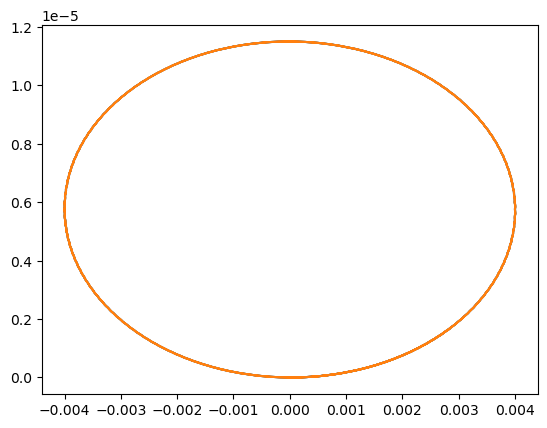

In [11]:
delta = []
zeta = []

delta_x = []
zeta_x = []

for i in range(1000):
    delta.append(ref_coords[i][-2])
    zeta.append(ref_coords[i][-1])

    delta_x.append(d_x_coords[i][-2])
    zeta_x.append(d_x_coords[i][-1])

plt.plot(delta, zeta)
plt.plot(delta_x, zeta_x)

In [72]:
displacements_x = np.asarray(displacements_x).reshape((len(displacements_x), 6))
displacements_px = np.asarray(displacements_px).reshape((len(displacements_x), 6))
displacements_y = np.asarray(displacements_y).reshape((len(displacements_x), 6))
displacements_delta = np.asarray(displacements_delta).reshape((len(displacements_x), 6))

In [73]:
gali_matrix = [np.asarray([
    displacements_x[i],
    displacements_px[i]
]) for i in range(len(displacements_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_px = np.prod(s, axis=1)

In [74]:
gali_matrix = [np.asarray([
    displacements_x[i],
    displacements_y[i]
]) for i in range(len(displacements_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_y = np.prod(s, axis=1)

In [75]:
gali_matrix = [np.asarray([
    displacements_x[i],
    displacements_delta[i]
]) for i in range(len(displacements_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_delta = np.prod(s, axis=1)

In [76]:
gali_matrix = [np.asarray([
    displacements_y[i],
    displacements_px[i]
]) for i in range(len(displacements_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_y_px = np.prod(s, axis=1)

In [77]:
gali_matrix = [np.asarray([
    displacements_x[i],
    displacements_px[i],
    displacements_y[i],
    displacements_delta[i],
]) for i in range(len(displacements_x))]
_, s, _ = np.linalg.svd(gali_matrix)
print(s[0])
gali_4 = np.prod(s, axis=1)

[1. 1. 1. 1.]


In [23]:
def birkhoff_weights(n):
    weights = np.arange(n, dtype=np.float64)
    weights /= n
    weights = np.exp(-1 / (weights * (1 - weights)))
    return weights / np.sum(weights)

bk_gali_val_x_px = np.empty_like(gali_val_x_px)
bk_gali_val_x_y = np.empty_like(gali_val_x_y)
bk_gali_val_x_delta = np.empty_like(gali_val_x_delta)
bk_gali_val_y_px = np.empty_like(gali_val_y_px)
bk_gali_4 = np.empty_like(gali_4)

for i in tqdm(range(len(gali_val_x_px))):
    weights = birkhoff_weights(i+1)
    bk_gali_val_x_px[i] = np.sum(weights * gali_val_x_px[:i+1])
    bk_gali_val_x_y[i] = np.sum(weights * gali_val_x_y[:i+1])
    bk_gali_val_x_delta[i] = np.sum(weights * gali_val_x_delta[:i+1])
    bk_gali_val_y_px[i] = np.sum(weights * gali_val_y_px[:i+1])
    bk_gali_4[i] = np.sum(weights * gali_4[:i+1])

  0%|          | 0/10001 [00:00<?, ?it/s]/tmp/ipykernel_32849/3938163054.py:4: RuntimeWarning: divide by zero encountered in true_divide
  weights = np.exp(-1 / (weights * (1 - weights)))
/tmp/ipykernel_32849/3938163054.py:5: RuntimeWarning: invalid value encountered in true_divide
  return weights / np.sum(weights)
100%|██████████| 10001/10001 [00:02<00:00, 4481.13it/s]


(0.0, 20.0)

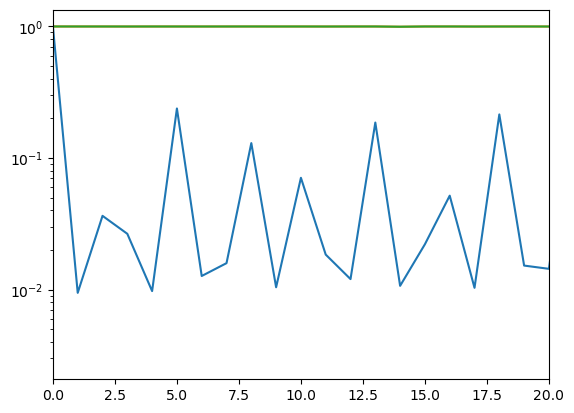

In [80]:
plt.plot(gali_val_x_px)
plt.plot(gali_val_x_y)
plt.plot(gali_val_y_px)
plt.yscale("log")
# plt.xscale("log")

plt.xlim(0, 20)
#

In [ ]:
import lmfit

def fit_func(resid, x, data=None):
    

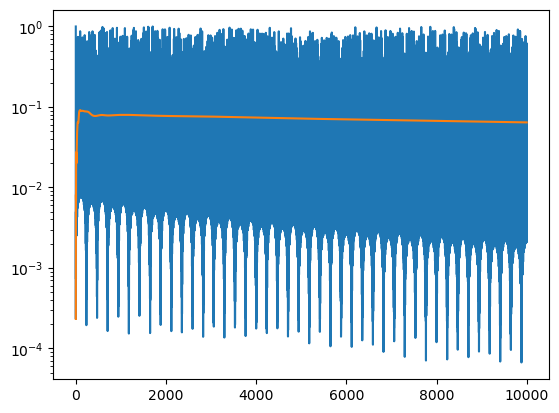

In [86]:
plt.plot(gali_4)
plt.yscale("log")

In [68]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

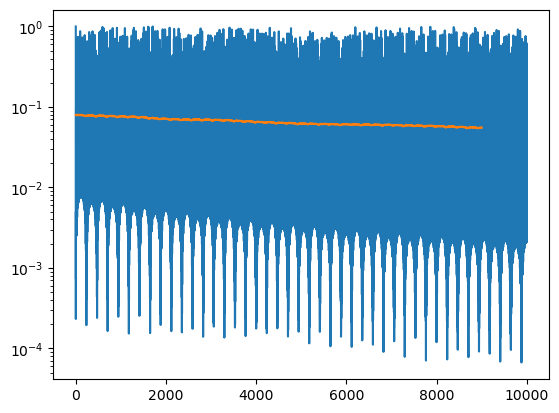

In [88]:
plt.plot(gali_4)
plt.plot(moving_average(gali_4, 1000))
plt.yscale("log")

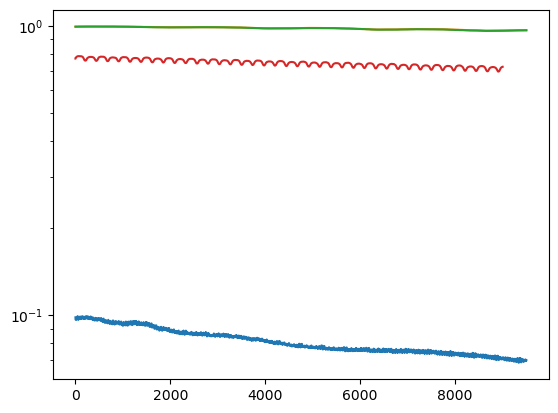

In [70]:
plt.plot(moving_average(gali_val_x_px, 500))
plt.plot(moving_average(gali_val_x_y, 500))
plt.plot(moving_average(gali_val_y_px, 500))
plt.plot(moving_average(gali_val_x_delta, 1000))
plt.yscale("log")
# plt.xscale("log")

# plt.xlim(0, 20)
#

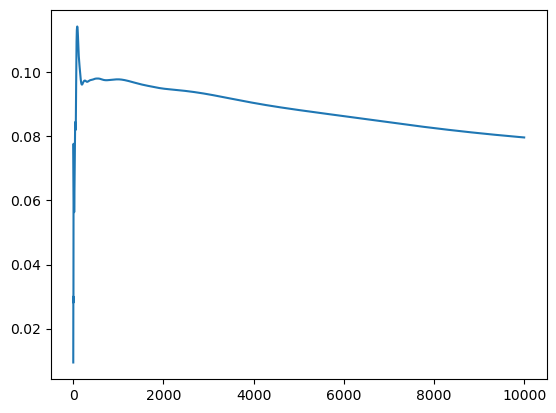

In [80]:
# plt.plot(gali_val_x_px)
plt.plot(bk_gali_val_x_px)
# plt.plot(gali_val_x_y)
# plt.plot(bk_gali_val_x_y)
# plt.plot(gali_val_y_px)
# plt.plot(gali_val_x_delta)
# plt.plot(bk_gali_val_x_delta)
# plt.yscale("log")
# plt.xscale("log")

# plt.xlim(0, 20)
#

In [58]:
print(displacements_px[0])
print(displacements_x[0])
print([displacements_x[i, 0], displacements_px[i, 0]], [displacements_x[i, 1], displacements_x[i, 1]])

[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1.0, 0.0] [0.0, 0.0]


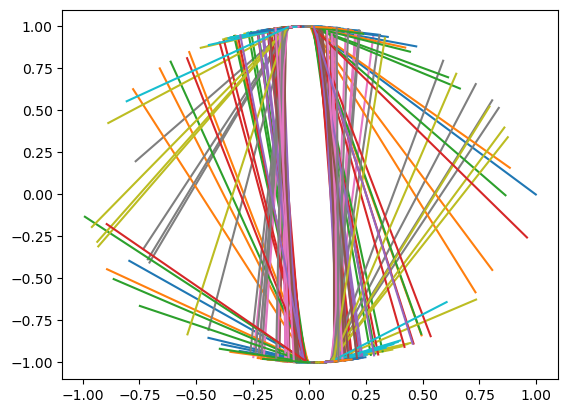

In [81]:
plt.figure()

for i in range(1000):
    plt.plot([displacements_x[i, 0], displacements_px[i, 0]], [displacements_x[i, 1], displacements_px[i, 1]])

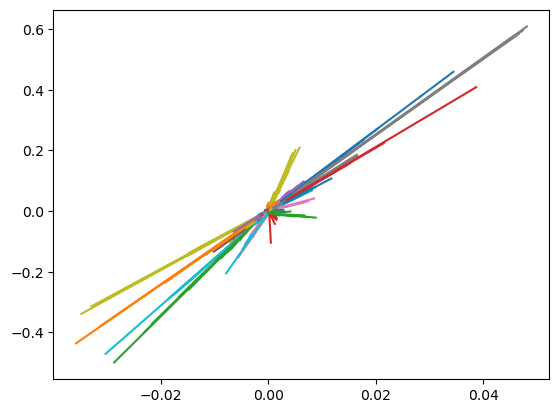

In [82]:
plt.figure()

for i in range(1000):
    plt.plot([displacements_x[i, 2], displacements_px[i, 2]], [displacements_x[i, 3], displacements_px[i, 3]])

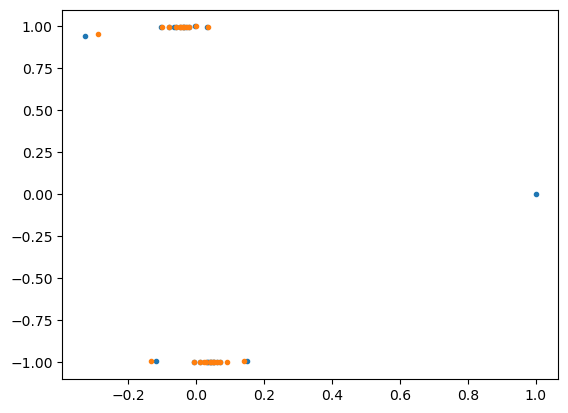

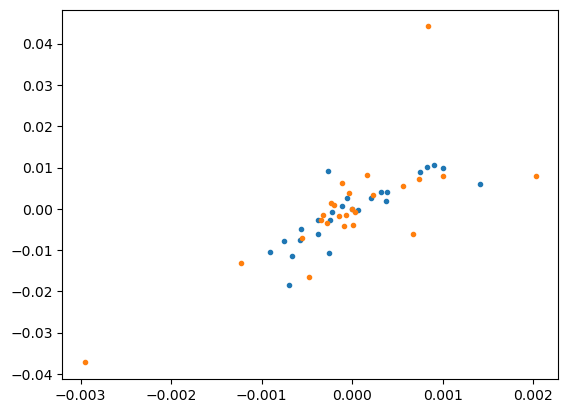

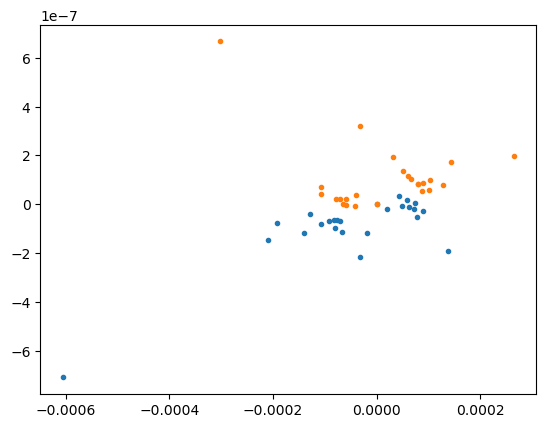

In [22]:
plt.figure()
plt.plot(displacements_x[:25, 0], displacements_x[:25, 1], ".")
plt.plot(displacements_px[:25, 0], displacements_px[:25, 1], ".")
plt.figure()
plt.plot(displacements_x[:25, 2], displacements_x[:25, 3], ".")
plt.plot(displacements_px[:25, 2], displacements_px[:25, 3], ".")
plt.figure()
plt.plot(displacements_x[:25, 4], displacements_x[:25, 5], ".")
plt.plot(displacements_px[:25, 4], displacements_px[:25, 5], ".")

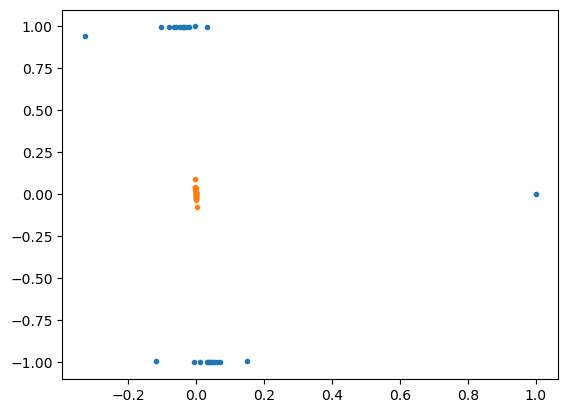

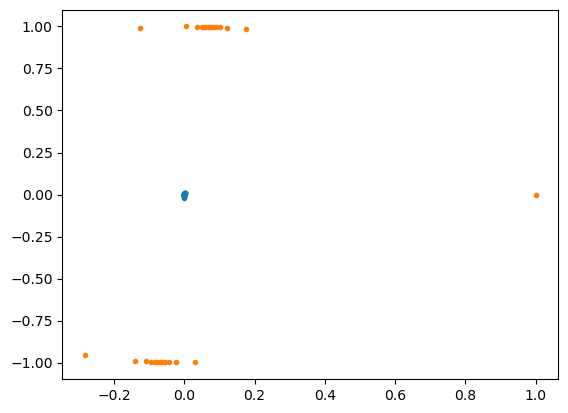

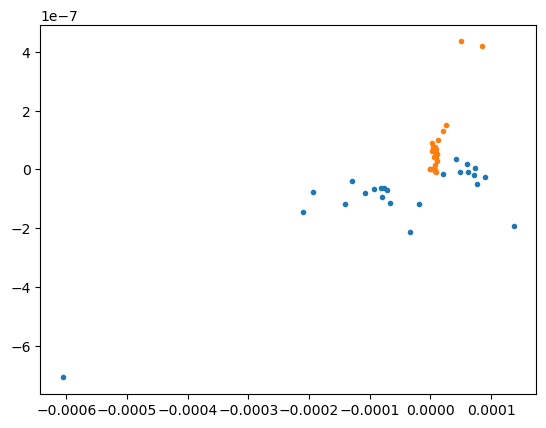

In [23]:
plt.figure()
plt.plot(displacements_x[:25, 0], displacements_x[:25, 1], ".")
plt.plot(displacements_y[:25, 0], displacements_y[:25, 1], ".")
plt.figure()
plt.plot(displacements_x[:25, 2], displacements_x[:25, 3], ".")
plt.plot(displacements_y[:25, 2], displacements_y[:25, 3], ".")
plt.figure()
plt.plot(displacements_x[:25, 4], displacements_x[:25, 5], ".")
plt.plot(displacements_y[:25, 4], displacements_y[:25, 5], ".")

In [111]:
particles._xobject.beta0 * 2

TypeError: unsupported operand type(s) for *: 'ArrNFloat64' and 'int'

In [3]:
def get_twiss_data(twiss, nemitt_x, nemitt_y, _context, idx_pos=0):
    twiss_data = _context.nplike_array_type(8)

    twiss_data[0] = nemitt_x
    twiss_data[1] = nemitt_y

    twiss_data[2] = twiss.x[idx_pos]
    twiss_data[3] = twiss.px[idx_pos]
    twiss_data[4] = twiss.y[idx_pos]
    twiss_data[5] = twiss.py[idx_pos]
    twiss_data[6] = twiss.zeta[idx_pos]
    twiss_data[7] = twiss.ptau[idx_pos]

    w = _context.nparray_to_context_array(twiss.W_matrix[idx_pos])
    w_inv = _context.nparray_to_context_array(np.linalg.inv(twiss.W_matrix[idx_pos]))

    return twiss_data, w, w_inv


def phys_to_norm(part, normed_part, twiss_data, w_inv, _context):
    mask = part.state <= 0
    gemitt_x = twiss_data[0] / part._xobject.beta0[0] / particles._xobject.gamma0[0]
    gemitt_y = twiss_data[1] / part._xobject.beta0[0] / particles._xobject.gamma0[0]

    normed_part[0] = (part.x - twiss_data[2])
    normed_part[1] = (part.px - twiss_data[3])
    normed_part[2] = (part.y - twiss_data[4])
    normed_part[3] = (part.py - twiss_data[5])
    normed_part[4] = (part.zeta - twiss_data[6])
    normed_part[5] = (part.ptau - twiss_data[7]) / part._xobject.beta0[0]

    normed_part = np.dot(w_inv, normed_part)

    normed_part[0] /= np.sqrt(gemitt_x)
    normed_part[1] /= np.sqrt(gemitt_x)
    normed_part[2] /= np.sqrt(gemitt_y)
    normed_part[3] /= np.sqrt(gemitt_y)

    normed_part[:, mask] = np.nan

    return normed_part

def norm_to_phys(normed_part, part, twiss_data, w, _context):
    mask = part.state <= 0
    gemitt_x = twiss_data[0] / part._xobject.beta0[0] / particles._xobject.gamma0[0]
    gemitt_y = twiss_data[1] / part._xobject.beta0[0] / particles._xobject.gamma0[0]

    normed = normed_part.copy()
    normed[0] *= np.sqrt(gemitt_x)
    normed[1] *= np.sqrt(gemitt_x)
    normed[2] *= np.sqrt(gemitt_y)
    normed[3] *= np.sqrt(gemitt_y)

    normed = np.dot(w, normed)

    part.zeta = normed[4] + twiss_data[6]
    part.ptau = normed[5] * part._xobject.beta0[0] + twiss_data[7]
    
    part.x = normed[0] + twiss_data[2]
    part.px = normed[1] + twiss_data[3]
    part.y = normed[2] + twiss_data[4]
    part.py = normed[3] + twiss_data[5]

    return part

def create_normed_placeholder(particles, twiss_data, w_inv, _context):
    normed_particles = _context.nplike_array_type([6, len(particles.x)])
    normed_particles = phys_to_norm(particles, normed_particles, twiss_data, w_inv, _context)
    return normed_particles


In [4]:
def neo_normed_distance(norm_ref_part, norm_part, ref_argsort, part_argsort):
    distance = np.sum(
        (norm_ref_part[:,ref_argsort] - norm_part[:, part_argsort]) ** 2, axis=0
    ) ** 0.5
    return distance

def neo_normed_direction(norm_ref_part, norm_part, ref_argsort, part_argsort):
    distance = neo_normed_distance(norm_ref_part, norm_part, ref_argsort, part_argsort)
    
    direction = (norm_part[:, part_argsort] - norm_ref_part[:, ref_argsort]) / distance

    return direction, distance

def neo_realignment(ref_part, part, norm_ref_part, norm_part, twiss_data, w, _context, target_distance=1e-6):
    ref_argsort = np.argsort(ref_part.particle_id)
    part_argsort = np.argsort(part.particle_id)

    direction, distance = neo_normed_direction(norm_ref_part, norm_part, ref_argsort, part_argsort)
    
    meta_argsort = np.argsort(part_argsort)

    norm_part = norm_ref_part[:, ref_argsort] + direction * target_distance

    part = norm_to_phys(norm_part[:, meta_argsort], part, twiss_data, w, _context)

    return part, direction, distance

In [11]:
twiss

NameError: name 'twiss' is not defined

In [258]:
disp = 1e-7
particles = tracker.build_particles(
                               zeta_norm=0.0, pzeta_norm=0.0,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_x = tracker.build_particles(
                               zeta_norm=0.0, pzeta_norm=0.0,
                               x_norm=[1+disp], # in sigmas
                               y_norm=[1.0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_px = tracker.build_particles(
                               zeta_norm=0.0, pzeta_norm=0.0,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0], # in sigmas
                               px_norm=[disp], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_y = tracker.build_particles(
                               zeta_norm=0.0, pzeta_norm=0.0,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0+disp],
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_py = tracker.build_particles(
                               zeta_norm=0.0, pzeta_norm=0.0,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0], # in sigmas
                               py_norm=[disp], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_zeta = tracker.build_particles(
                               zeta_norm=disp, pzeta_norm=0.0,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_pzeta = tracker.build_particles(
                               zeta_norm=0.0, pzeta_norm=disp,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
    

twiss_data, w, w_inv = get_twiss_data(twiss, 2.5e-6, 2.5e-6, context)

normed_part = create_normed_placeholder(particles, twiss_data, w_inv, context)

normed_part_x = create_normed_placeholder(particles_x, twiss_data, w_inv, context)
normed_part_px = create_normed_placeholder(particles_px, twiss_data, w_inv, context)
normed_part_y = create_normed_placeholder(particles_y, twiss_data, w_inv, context)
normed_part_py = create_normed_placeholder(particles_py, twiss_data, w_inv, context)
normed_part_zeta = create_normed_placeholder(particles_zeta, twiss_data, w_inv, context)
normed_part_pzeta = create_normed_placeholder(particles_pzeta, twiss_data, w_inv, context)

argsort_ref = np.argsort(particles.particle_id)

direction_x_list = []
distance_x_list = []

argsort_x = np.argsort(particles_x.particle_id)
direction, distance = neo_normed_direction(normed_part, normed_part_x, argsort_ref, argsort_x)
direction_x_list.append(direction)
distance_x_list.append(distance)

direction_px_list = []
distance_px_list = []

argsort_px = np.argsort(particles_px.particle_id)
direction, distance = neo_normed_direction(normed_part, normed_part_px, argsort_ref, argsort_px)
direction_px_list.append(direction)
distance_px_list.append(distance)

direction_y_list = []
distance_y_list = []

argsort_y = np.argsort(particles_y.particle_id)
direction, distance = neo_normed_direction(normed_part, normed_part_y, argsort_ref, argsort_y)
direction_y_list.append(direction)
distance_y_list.append(distance)

direction_py_list = []
distance_py_list = []

argsort_py = np.argsort(particles_py.particle_id)
direction, distance = neo_normed_direction(normed_part, normed_part_py, argsort_ref, argsort_py)
direction_py_list.append(direction)
distance_py_list.append(distance)

direction_zeta_list = []
distance_zeta_list = []

argsort_zeta = np.argsort(particles_zeta.particle_id)
direction, distance = neo_normed_direction(normed_part, normed_part_zeta, argsort_ref, argsort_zeta)
direction_zeta_list.append(direction)
distance_zeta_list.append(distance)

direction_pzeta_list = []
distance_pzeta_list = []

argsort_pzeta = np.argsort(particles_pzeta.particle_id)
direction, distance = neo_normed_direction(normed_part, normed_part_pzeta, argsort_ref, argsort_pzeta)
direction_pzeta_list.append(direction)
distance_pzeta_list.append(distance)

step = 1
for i in tqdm(range(0, 4000, step)):
    tracker.track(particles, num_turns=step)
    tracker.track(particles_x, num_turns=step)
    tracker.track(particles_px, num_turns=step)
    tracker.track(particles_y, num_turns=step)
    tracker.track(particles_py, num_turns=step)
    tracker.track(particles_zeta, num_turns=step)
    tracker.track(particles_pzeta, num_turns=step)

    argsort_ref = np.argsort(particles.particle_id)
    argsort_x = np.argsort(particles_x.particle_id)
    argsort_px = np.argsort(particles_px.particle_id)
    argsort_y = np.argsort(particles_y.particle_id)
    argsort_py = np.argsort(particles_py.particle_id)
    argsort_zeta = np.argsort(particles_zeta.particle_id)
    argsort_pzeta = np.argsort(particles_pzeta.particle_id)

    normed_part = phys_to_norm(particles, normed_part, twiss_data, w_inv, context)
    normed_part_x = phys_to_norm(particles_x, normed_part_x, twiss_data, w_inv, context)
    normed_part_px = phys_to_norm(particles_px, normed_part_px, twiss_data, w_inv, context)
    normed_part_y = phys_to_norm(particles_y, normed_part_y, twiss_data, w_inv, context)
    normed_part_py = phys_to_norm(particles_py, normed_part_py, twiss_data, w_inv, context)
    normed_part_zeta = phys_to_norm(particles_zeta, normed_part_zeta, twiss_data, w_inv, context)
    normed_part_pzeta = phys_to_norm(particles_pzeta, normed_part_pzeta, twiss_data, w_inv, context)

    direction, distance = neo_normed_direction(normed_part, normed_part_x, argsort_ref, argsort_x)
    direction_x_list.append(direction)
    distance_x_list.append(distance)

    direction, distance = neo_normed_direction(normed_part, normed_part_px, argsort_ref, argsort_px)
    direction_px_list.append(direction)
    distance_px_list.append(distance)

    direction, distance = neo_normed_direction(normed_part, normed_part_y, argsort_ref, argsort_y)
    direction_y_list.append(direction)
    distance_y_list.append(distance)

    direction, distance = neo_normed_direction(normed_part, normed_part_py, argsort_ref, argsort_py)
    direction_py_list.append(direction)
    distance_py_list.append(distance)

    direction, distance = neo_normed_direction(normed_part, normed_part_zeta, argsort_ref, argsort_zeta)
    direction_zeta_list.append(direction)
    distance_zeta_list.append(distance)

    direction, distance = neo_normed_direction(normed_part, normed_part_pzeta, argsort_ref, argsort_pzeta)
    direction_pzeta_list.append(direction)
    distance_pzeta_list.append(distance)

    # particles_x, _, _ = neo_realignment(particles, particles_x, normed_part, normed_part_x, twiss_data, w, context, target_distance=disp)
    # particles_px, _, _ = neo_realignment(particles, particles_px, normed_part, normed_part_px, twiss_data, w, context, target_distance=disp)
    # particles_y, _, _ = neo_realignment(particles, particles_y, normed_part, normed_part_y, twiss_data, w, context, target_distance=disp)
    # particles_py, _, _ = neo_realignment(particles, particles_py, normed_part, normed_part_py, twiss_data, w, context, target_distance=disp)
    # particles_zeta, _, _ = neo_realignment(particles, particles_zeta, normed_part, normed_part_zeta, twiss_data, w, context, target_distance=disp)
    # particles_pzeta, _, _ = neo_realignment(particles, particles_pzeta, normed_part, normed_part_pzeta, twiss_data, w, context, target_distance=disp)


100%|██████████| 4000/4000 [03:20<00:00, 19.97it/s]


In [282]:
particles = tracker.build_particles(
                               zeta_norm=1.0, pzeta_norm=0.0,
                               x_norm=[1.0], # in sigmas
                               y_norm=[1.0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
print(particles.x, particles.px, particles.y, particles.py, particles.zeta, particles.pzeta)
normed_part = phys_to_norm(particles, normed_part, twiss_data, w_inv, context)
neo_particles = norm_to_phys(normed_part, particles, twiss_data, w, context)
print(neo_particles.x, neo_particles.px, neo_particles.y, neo_particles.py, neo_particles.zeta, neo_particles.pzeta)
print(normed_part)
print(twiss.get_normalized_coordinates(particles, nemitt_x=2.5e-6, nemitt_y=2.5e-6))


[0.0014292] [-8.24179864e-06] [-0.00210486] [-1.8716429e-05] [26.37946885] [-0.00018272]
[0.0014292] [-8.24179864e-06] [-0.00210486] [-1.8716429e-05] [26.37946885] [-0.00018272]
[[ 1.00000000e+00]
 [-1.56868940e-13]
 [ 1.00000000e+00]
 [-1.35168121e-15]
 [ 1.00000000e+00]
 [-1.51207954e-18]]
{'particle_id': array([0]), 'at_element': array([0]), 'x_norm': array([1.]), 'px_norm': array([-3.15005082e-13]), 'y_norm': array([1.]), 'py_norm': array([6.75840604e-16]), 'zeta_norm': array([1.]), 'pzeta_norm': array([-2.3794479e-18])}


In [260]:
direction_x_list = np.asarray(direction_x_list).reshape((len(direction_x_list), 6))
direction_px_list = np.asarray(direction_px_list).reshape((len(direction_px_list), 6))
direction_y_list = np.asarray(direction_y_list).reshape((len(direction_y_list), 6))
direction_py_list = np.asarray(direction_py_list).reshape((len(direction_py_list), 6))
direction_zeta_list = np.asarray(direction_zeta_list).reshape((len(direction_zeta_list), 6))
direction_pzeta_list = np.asarray(direction_pzeta_list).reshape((len(direction_pzeta_list), 6))

In [215]:
print(direction_x_list[-1])
print(direction_px_list[-1])

[-9.85470780e-01 -1.27273969e-02 -1.03067147e-01 -1.34396872e-01
 -1.18403439e-06 -4.75299514e-06]
[-9.83178845e-01 -1.80509894e-01 -1.74756555e-02 -2.16826806e-02
  5.05282763e-07 -3.36386343e-06]


In [261]:
print(np.linalg.svd([
    direction_x_list[0],
    direction_px_list[0],
]))
print()
print(np.linalg.svd([
    direction_x_list[-1],
    direction_px_list[-1],
]))

(array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]), array([1., 1.]), array([[ 7.07106775e-01, -7.07106787e-01,  1.57009246e-09,
         2.17011263e-09,  8.18867018e-17, -6.79893591e-14],
       [ 7.07106787e-01,  7.07106775e-01, -1.57009246e-09,
         1.86209668e-09,  1.28679105e-16, -4.96233424e-14],
       [ 1.47721967e-17,  2.22044605e-09,  1.00000000e+00,
        -2.41806760e-19,  3.67342002e-26,  1.44181720e-23],
       [-2.85120254e-09,  2.17800195e-10, -2.41806781e-19,
         1.00000000e+00, -2.08658150e-25,  1.19974014e-22],
       [-1.48892510e-16, -3.30872245e-17,  3.67341991e-26,
        -2.08658151e-25,  1.00000000e+00,  5.97645585e-30],
       [ 8.31647387e-14, -1.29867356e-14,  1.44181726e-23,
         1.19974014e-22,  5.97645583e-30,  1.00000000e+00]]))

(array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]), array([1.38136997, 0.30301323]), array([[-4.74840711e-01,  8.74448705e-01, -8.09323828e-02,
         5.75822129e-02,  2.

In [273]:
gali_matrix = [np.asarray([
    direction_pzeta_list[i],
    direction_zeta_list[i]
]) for i in range(len(direction_x_list))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_px = np.prod(s, axis=1)

(100.0, 6055.6810206513765)

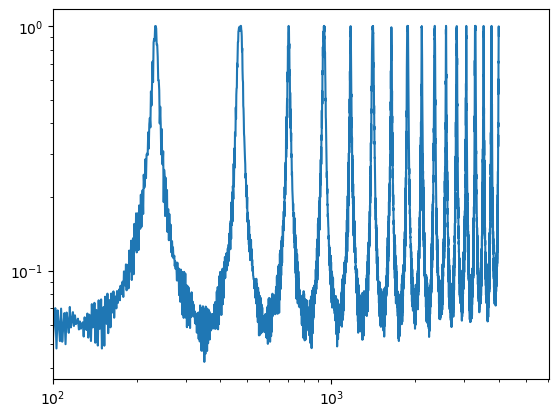

In [274]:
plt.plot(gali_val_x_px)
# plt.plot(1000/np.arange(len(gali_val_x_px)))
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e2)

In [264]:
gali_matrix = [np.asarray([
    direction_y_list[i],
    direction_x_list[i]
]) for i in range(len(direction_x_list))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_px = np.prod(s, axis=1)

(100.0, 6055.6810206513765)

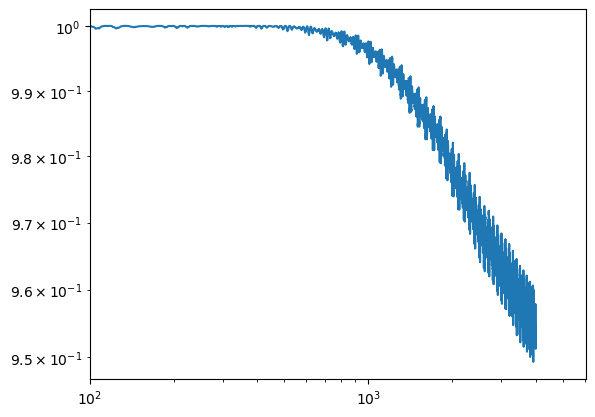

In [265]:
plt.plot(gali_val_x_px)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e2)

In [188]:
print(direction_x_list[0])
print(direction_px_list[0])
idx = 10
print(direction_x_list[idx])
print(direction_px_list[idx])

[ 1.00000000e+00  6.99394375e-11 -6.60000590e-13  6.60000590e-13
  1.22913869e-17 -1.61150648e-14]
[-2.22044605e-10  1.00000000e+00 -1.98000177e-12  0.00000000e+00
 -1.71187613e-17 -9.33907591e-15]
[ 7.90184042e-01  6.12866325e-01 -1.18032943e-03 -1.62919701e-03
 -2.75287788e-06 -2.83245731e-07]
[-1.21585152e-01  9.92580839e-01 -3.24632576e-04  4.73562115e-04
 -3.29130260e-06  4.20577609e-06]


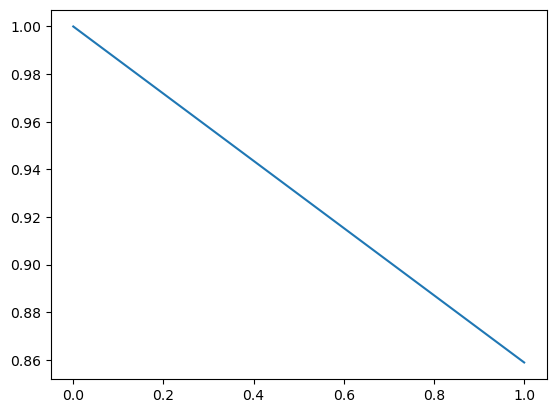

In [192]:
plt.plot(gali_val_x_px)

In [166]:
gali_matrix = [np.asarray([
    direction_x_list[i],
    direction_px_list[i],
    direction_y_list[i],
    direction_py_list[i],
]) for i in range(len(direction_x_list))]
_, s, _ = np.linalg.svd(gali_matrix)
print(s[0])
gali_4 = np.prod(s, axis=1)

[1. 1. 1. 1.]


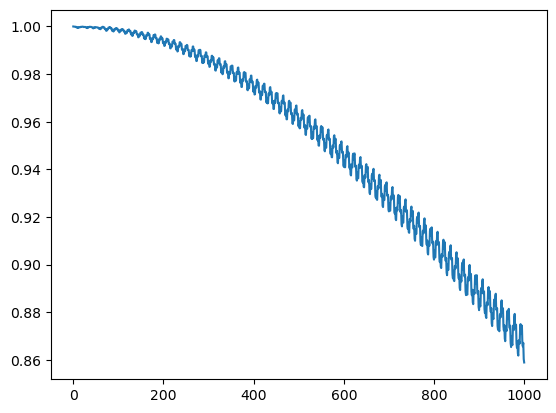

In [167]:
plt.plot(gali_4)

In [137]:
# Built a set of three particles with different x coordinates
particles = tracker.build_particles(
                               zeta=0.3, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
# print(particles)
twiss_data, w, w_inv = get_twiss_data(twiss, 2.5e-6, 2.5e-6, context)
# print(twiss_data)
normed_part = create_normed_placeholder(particles, context)
print()
normed_part = phys_to_norm(particles, normed_part, twiss_data, w_inv, context)
print(normed_part)

print()
print(particles.x, particles.px, particles.y, particles.py, particles.zeta, particles.ptau)
particles = norm_to_phys(normed_part, particles, twiss_data, w, context)
print(particles.x, particles.px, particles.y, particles.py, particles.zeta, particles.ptau)
print()
print(normed_part)




[ 3.00000000e-06  3.00000000e-06 -2.43773455e-07 -9.61656080e-08
  9.85934410e-08  4.93492307e-09  2.61517181e-06  5.75036467e-06]

[[ 1.00000000e+00]
 [-1.37131623e-15]
 [-3.16800283e-17]
 [-3.16800283e-17]
 [ 1.13722469e-02]
 [-9.51537754e-05]]

[0.0002321] [-4.22296326e-06] [-2.61310819e-05] [-2.32105016e-07] [0.3] [-7.17828668e-22]
[0.0002321] [-4.22296326e-06] [-2.61310819e-05] [-2.32105016e-07] [0.3] [0.]

[[ 1.00000000e+00]
 [-1.37131623e-15]
 [-3.16800283e-17]
 [-3.16800283e-17]
 [ 1.13722469e-02]
 [-9.51537754e-05]]


In [120]:
np.linalg.inv(twiss.W_matrix[0])

array([[ 9.21209517e-02,  9.27307135e-09, -1.88703087e-03,
         1.35433158e-01, -4.12289699e-06,  2.28472641e-02],
       [ 2.05635592e-01,  1.08550814e+01, -1.03339661e-03,
         6.34843857e-02, -6.55108264e-06,  1.78786559e-01],
       [ 1.48434753e-03,  9.91928847e-02,  6.74732728e-02,
        -1.98496143e-07,  6.08261495e-06, -1.65278261e-03],
       [ 3.75890333e-04,  3.86894631e-02, -1.80177719e-01,
         1.48203858e+01, -3.90683362e-06, -5.45845281e-03],
       [-4.54729399e-04,  9.29861877e-03,  4.38493270e-05,
        -2.57475130e-03,  3.79083019e-02, -3.15171012e-06],
       [ 4.09325008e-06,  1.21470648e-03,  2.22950694e-05,
        -2.39935923e-03,  1.88474425e-04,  2.63794628e+01]])

In [117]:
twiss.get_normalized_coordinates(particles, 2.5e-6, 2.5e-6)

{'particle_id': array([0]),
 'at_element': array([0]),
 'x_norm': array([1.]),
 'px_norm': array([4.98630446e-16]),
 'y_norm': array([0.]),
 'py_norm': array([1.32000118e-18]),
 'zeta_norm': array([-2.36461036e-07]),
 'pzeta_norm': array([-0.0001517])}

In [51]:
def neo_normed_distance(orig_ref_part, orig_part, twiss, nemitt_x=2.5e-6, nemitt_y=2.5e-6):
    ref_part = twiss.get_normalized_coordinates(orig_ref_part, nemitt_x=nemitt_x, nemitt_y=nemitt_y)
    part = twiss.get_normalized_coordinates(orig_part, nemitt_x=nemitt_x, nemitt_y=nemitt_y)

    ref_argsort = np.argsort(ref_part["particle_id"])
    part_argsort = np.argsort(part["particle_id"])

    distance = (
        (ref_part["x_norm"][ref_argsort] - part["x_norm"][part_argsort]) ** 2
        + (ref_part["px_norm"][ref_argsort] - part["px_norm"][part_argsort]) ** 2
        + (ref_part["y_norm"][ref_argsort] - part["y_norm"][part_argsort]) ** 2
        + (ref_part["py_norm"][ref_argsort] - part["py_norm"][part_argsort]) ** 2
        + (ref_part["zeta_norm"][ref_argsort] - part["zeta_norm"][part_argsort]) ** 2
        + (ref_part["pzeta_norm"][ref_argsort] - part["pzeta_norm"][part_argsort]) ** 2
    ) ** 0.5
    return distance, ref_part, part, ref_argsort, part_argsort


def neo_normed_direction(ref_part_orig, part_orig, twiss, nemitt_x=2.5e-6, nemitt_y=2.5e-6):
    distance, ref_part, part, ref_argsort, part_argsort = neo_normed_distance(
        ref_part_orig, part_orig, twiss, nemitt_x=nemitt_x, nemitt_y=nemitt_y)
    
    x_dist = -(ref_part["x_norm"][ref_argsort] - part["x_norm"][part_argsort]) / distance
    px_dist = -(ref_part["px_norm"][ref_argsort] - part["px_norm"][part_argsort]) / distance
    y_dist = -(ref_part["y_norm"][ref_argsort] - part["y_norm"][part_argsort]) / distance
    py_dist = -(ref_part["py_norm"][ref_argsort] - part["py_norm"][part_argsort]) / distance
    zeta_dist = -(ref_part["zeta_norm"][ref_argsort] - part["zeta_norm"][part_argsort]) / distance
    pzeta_dist = -(ref_part["pzeta_norm"][ref_argsort] - part["pzeta_norm"][part_argsort]) / distance

    return (x_dist, px_dist, y_dist, py_dist, zeta_dist, pzeta_dist), distance, ref_part, part, ref_argsort, part_argsort


def neo_realignment(ref_part_orig, part_orig, twiss, tracker, nemitt_x=2.5e-6, nemitt_y=2.5e-6, target_distance=1e-6):
    direction, distance, ref_part, part, ref_argsort, part_argsort = neo_normed_direction(ref_part_orig, part_orig, twiss, nemitt_x=nemitt_x, nemitt_y=nemitt_y)
    
    meta_argsort = np.argsort(part_argsort)

    state=part_orig.state,
    at_element=part_orig.at_element,
    at_turn=part_orig.at_turn,

    part_orig = tracker.build_particles(
        x_norm=ref_part["x_norm"][meta_argsort] + target_distance * direction[0][meta_argsort],
        px_norm=ref_part["px_norm"][meta_argsort] + target_distance * direction[1][meta_argsort],
        y_norm=ref_part["y_norm"][meta_argsort] + target_distance * direction[2][meta_argsort],
        py_norm=ref_part["py_norm"][meta_argsort] + target_distance * direction[3][meta_argsort],
        zeta_norm=ref_part["zeta_norm"][meta_argsort] + target_distance * direction[4][meta_argsort],
        pzeta_norm=ref_part["pzeta_norm"][meta_argsort] + target_distance * direction[5][meta_argsort],
        nemitt_x=nemitt_x, nemitt_y=nemitt_y,
    )

    part_orig.state=state[0],
    part_orig.at_element=at_element[0],
    part_orig.at_turn=at_turn[0],

    return part_orig, direction, distance




In [46]:
disp = 1e-8

particles = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_x = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1+disp], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_px = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0+disp], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_y = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               y_norm=[disp], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_zeta = tracker.build_particles(
                               zeta=disp,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)


In [48]:
print(neo_normed_distance(particles, particles_x, twiss))
print(neo_normed_direction(particles, particles_x, twiss))
part, _, _ = neo_realignment(particles, particles_x, twiss, tracker)

print(part.state)
print(part.at_turn)
print(part.at_element)

(array([9.99999994e-09]), {'particle_id': array([0]), 'at_element': array([0]), 'x_norm': array([1.]), 'px_norm': array([4.98630446e-16]), 'y_norm': array([0.]), 'py_norm': array([1.32000118e-18]), 'zeta_norm': array([-2.36461036e-07]), 'pzeta_norm': array([-0.0001517])}, {'particle_id': array([0]), 'at_element': array([0]), 'x_norm': array([1.00000001]), 'px_norm': array([7.29517214e-16]), 'y_norm': array([6.6000059e-19]), 'py_norm': array([1.32000118e-18]), 'zeta_norm': array([-2.36461037e-07]), 'pzeta_norm': array([-0.0001517])}, array([0]), array([0]))
((array([1.]), array([2.3088677e-08]), array([6.60000594e-11]), array([-0.]), array([-1.37324378e-07]), array([-4.13623131e-09])), array([9.99999994e-09]), {'particle_id': array([0]), 'at_element': array([0]), 'x_norm': array([1.]), 'px_norm': array([4.98630446e-16]), 'y_norm': array([0.]), 'py_norm': array([1.32000118e-18]), 'zeta_norm': array([-2.36461036e-07]), 'pzeta_norm': array([-0.0001517])}, {'particle_id': array([0]), 'at_el

In [52]:
# Built a set of three particles with different x coordinates
disp = 1e-8

particles = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_x = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1+disp], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_px = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0+disp], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_y = tracker.build_particles(
                               zeta=0, delta=0,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               y_norm=[disp], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)
particles_zeta = tracker.build_particles(
                               zeta=disp,
                               x_norm=[1], # in sigmas
                               px_norm=[0], # in sigmas
                               nemitt_x=2.5e-6, nemitt_y=2.5e-6)

displacements_norm_x = []
displacements_norm_px = []
displacements_norm_y = []
displacements_norm_zeta = []

displacements_norm_pre_x = []
displacements_norm_pre_px = []
displacements_norm_pre_y = []
displacements_norm_pre_zeta = []

mod_pre_norm_x = []
mod_pre_norm_px = []
mod_pre_norm_y = []
mod_pre_norm_zeta = []

mod_post_norm_x = []
mod_post_norm_px = []
mod_post_norm_y = []
mod_post_norm_zeta = []

displacements_norm_pre_x.append(neo_normed_direction(particles, particles_x, twiss)[0])
displacements_norm_pre_px.append(neo_normed_direction(particles, particles_px, twiss)[0])
displacements_norm_pre_y.append(neo_normed_direction(particles, particles_y, twiss)[0])
displacements_norm_pre_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[0])

mod_pre_norm_x.append(neo_normed_direction(particles, particles_x, twiss)[1])
mod_pre_norm_px.append(neo_normed_direction(particles, particles_px, twiss)[1])
mod_pre_norm_y.append(neo_normed_direction(particles, particles_y, twiss)[1])
mod_pre_norm_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[1])

displacements_norm_x.append(neo_normed_direction(particles, particles_x, twiss)[0])
displacements_norm_px.append(neo_normed_direction(particles, particles_px, twiss)[0])
displacements_norm_y.append(neo_normed_direction(particles, particles_y, twiss)[0])
displacements_norm_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[0])

mod_post_norm_x.append(neo_normed_direction(particles, particles_x, twiss)[1])
mod_post_norm_px.append(neo_normed_direction(particles, particles_px, twiss)[1])
mod_post_norm_y.append(neo_normed_direction(particles, particles_y, twiss)[1])
mod_post_norm_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[1])

step = 1

for i in tqdm(range(0, 10000, step)):
    tracker.track(particles, num_turns=step)
    tracker.track(particles_x, num_turns=step)
    tracker.track(particles_px, num_turns=step)
    tracker.track(particles_y, num_turns=step)
    tracker.track(particles_zeta, num_turns=step)


    displacements_norm_pre_x.append(neo_normed_direction(particles, particles_x, twiss)[0])
    displacements_norm_pre_px.append(neo_normed_direction(particles, particles_px, twiss)[0])
    displacements_norm_pre_y.append(neo_normed_direction(particles, particles_y, twiss)[0])
    displacements_norm_pre_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[0])

    mod_pre_norm_x.append(neo_normed_direction(particles, particles_x, twiss)[1])
    mod_pre_norm_px.append(neo_normed_direction(particles, particles_px, twiss)[1])
    mod_pre_norm_y.append(neo_normed_direction(particles, particles_y, twiss)[1])
    mod_pre_norm_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[1])

    particles_x, _, _ = neo_realignment(particles, particles_x, twiss, tracker, target_distance=disp)
    particles_px, _, _ = neo_realignment(particles, particles_px, twiss, tracker, target_distance=disp)
    particles_y, _, _ = neo_realignment(particles, particles_y, twiss, tracker, target_distance=disp)
    particles_zeta, _, _ = neo_realignment(particles, particles_zeta, twiss, tracker, target_distance=disp)

    displacements_norm_x.append(neo_normed_direction(particles, particles_x, twiss)[0])
    displacements_norm_px.append(neo_normed_direction(particles, particles_px, twiss)[0])
    displacements_norm_y.append(neo_normed_direction(particles, particles_y, twiss)[0])
    displacements_norm_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[0])

    mod_post_norm_x.append(neo_normed_direction(particles, particles_x, twiss)[1])
    mod_post_norm_px.append(neo_normed_direction(particles, particles_px, twiss)[1])
    mod_post_norm_y.append(neo_normed_direction(particles, particles_y, twiss)[1])
    mod_post_norm_zeta.append(neo_normed_direction(particles, particles_zeta, twiss)[1])

  1%|          | 100/10000 [02:18<3:48:20,  1.38s/it]


KeyboardInterrupt: 

In [54]:
displacements_norm_x = np.asarray(displacements_norm_x).reshape((len(displacements_norm_x), 6))
displacements_norm_px = np.asarray(displacements_norm_px).reshape((len(displacements_norm_x), 6))
displacements_norm_y = np.asarray(displacements_norm_y).reshape((len(displacements_norm_x), 6))
displacements_norm_zeta = np.asarray(displacements_norm_zeta).reshape((len(displacements_norm_x), 6))

In [65]:
gali_matrix = [np.asarray([
    displacements_norm_x[i],
    displacements_norm_px[i]
]) for i in range(len(displacements_norm_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_px = np.prod(s, axis=1)

In [66]:
gali_matrix = [np.asarray([
    displacements_norm_x[i],
    displacements_norm_y[i]
]) for i in range(len(displacements_norm_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_y = np.prod(s, axis=1)

In [67]:
gali_matrix = [np.asarray([
    displacements_norm_x[i],
    displacements_norm_zeta[i]
]) for i in range(len(displacements_norm_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_x_zeta = np.prod(s, axis=1)

In [68]:
gali_matrix = [np.asarray([
    displacements_norm_y[i],
    displacements_norm_px[i]
]) for i in range(len(displacements_norm_x))]
_, s, _ = np.linalg.svd(gali_matrix)
gali_val_y_px = np.prod(s, axis=1)

In [86]:
gali_matrix = [np.asarray([
    displacements_norm_x[i],
    displacements_norm_px[i],
    displacements_norm_y[i],
    displacements_norm_zeta[i],
]) for i in range(len(displacements_norm_x))]
_, s, _ = np.linalg.svd(gali_matrix)
print(s[0])
gali_4 = np.prod(s, axis=1)

[1.00000002 1.         0.99999998]


(0.0, 20.0)

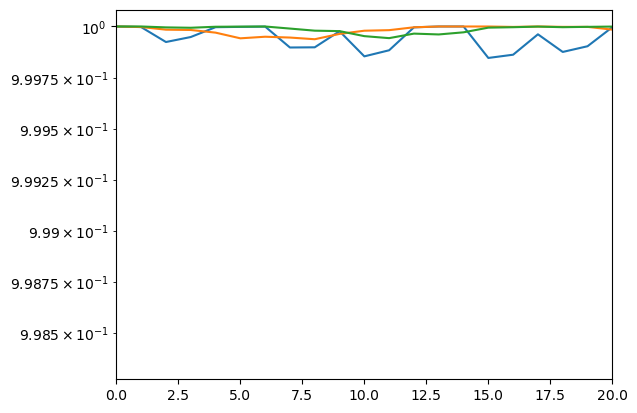

In [70]:
plt.plot(gali_val_x_px)
plt.plot(gali_val_x_y)
plt.plot(gali_val_y_px)
plt.yscale("log")
# plt.xscale("log")

plt.xlim(0, 20)
#

In [91]:
gali_matrix = [np.asarray([
    displacements_norm_x[i],
    displacements_norm_px[i],
    displacements_norm_y[i],
    # displacements_norm_zeta[i],
]) for i in range(len(displacements_norm_x))]
_, s, _ = np.linalg.svd(gali_matrix)
print(s[0])
gali_4 = np.prod(s, axis=1)

[1.00000002 1.         0.99999998]


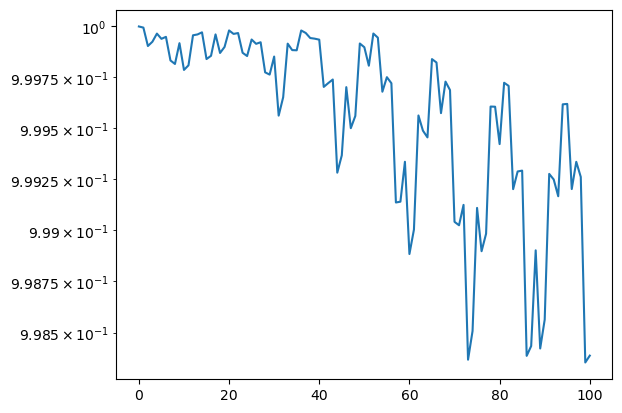

In [92]:
plt.plot(gali_4)
plt.yscale("log")
# plt.xscale("log")
